<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Python_Bootstrap_in_Bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Point Estimate of Statistic (Alpha): 0.6894
Bootstrap Standard Error: 0.0377


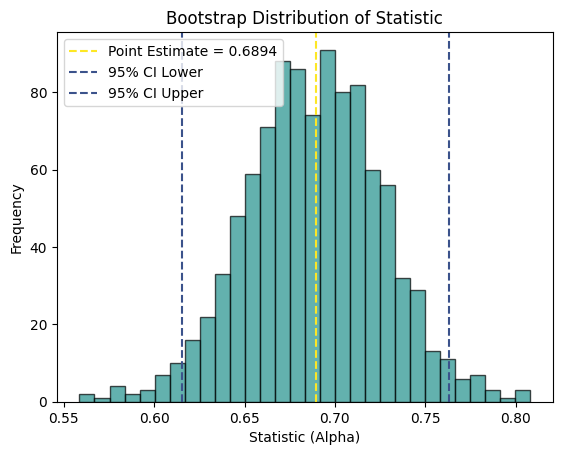

Point Estimate of Coefficient: 2.9165
Bootstrap Standard Error of Coefficient: 0.0593


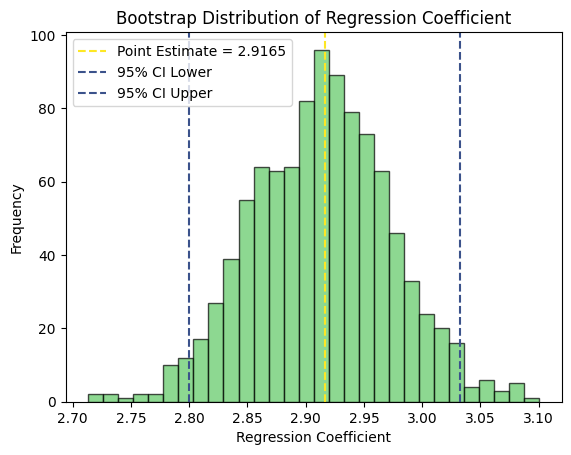

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# I start by defining the function that calculates my statistic of interest.
# This is the core computation for the bootstrap process.
def alpha_func(data):
    """
    Calculates the ratio of variances and covariances for genomic features X and Y.
    This simulates a complex bioinformatics statistic.
    """
    X, Y = data[:, 0], data[:, 1]
    var_X = np.var(X, ddof=1)  # I calculate the sample variance of X.
    var_Y = np.var(Y, ddof=1)  # I calculate the sample variance of Y.
    cov_XY = np.cov(X, Y)[0, 1]  # Here, I compute the covariance between X and Y.

    # The ratio balances variance and covariance in a biologically meaningful way.
    return (var_Y - cov_XY) / (var_X + var_Y - 2 * cov_XY)

# I simulate a bioinformatics dataset representing genomic features across conditions.
np.random.seed(42)
n_conditions = 100
X = np.random.normal(10, 2, n_conditions)  # Feature X (e.g., gene expression levels)
Y = np.random.normal(8, 3, n_conditions)   # Feature Y (e.g., protein abundance)
data = np.column_stack((X, Y))

# Point estimate of the statistic on the full dataset
alpha_point = alpha_func(data)
print(f"Point Estimate of Statistic (Alpha): {alpha_point:.4f}")

# Writing the bootstrap function
# I automate the bootstrap process here for any statistic of interest.
def boot_SE(estimator, data, n_bootstrap=1000):
    """
    Computes the bootstrap standard error for a given estimator and dataset.
    """
    estimates = []
    n = len(data)  # I need the size of the dataset for resampling.

    for _ in range(n_bootstrap):
        # Resampling the data with replacement
        indices = np.random.choice(range(n), size=n, replace=True)
        bootstrap_sample = data[indices]

        # Applying the estimator to the bootstrap sample
        estimates.append(estimator(bootstrap_sample))

    # I return the standard deviation of the estimates as the standard error.
    return np.std(estimates), np.array(estimates)

# Applying the bootstrap to estimate the standard error of alpha
n_bootstrap = 1000
alpha_se, bootstrap_estimates = boot_SE(alpha_func, data, n_bootstrap)

print(f"Bootstrap Standard Error: {alpha_se:.4f}")

# Visualizing the bootstrap distribution
# I like to visualize the variability of my statistic using a histogram.
plt.hist(bootstrap_estimates, bins=30, color="#21908CFF", edgecolor="black", alpha=0.7)
plt.axvline(alpha_point, color="#FDE725FF", linestyle="--", label=f"Point Estimate = {alpha_point:.4f}")
plt.axvline(alpha_point - 1.96 * alpha_se, color="#3B528BFF", linestyle="--", label="95% CI Lower")
plt.axvline(alpha_point + 1.96 * alpha_se, color="#3B528BFF", linestyle="--", label="95% CI Upper")
plt.xlabel("Statistic (Alpha)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of Statistic")
plt.legend()
plt.show()

# Extending the bootstrap to linear regression
from sklearn.linear_model import LinearRegression

# I simulate a simple linear regression problem for genomic data.
X = np.random.normal(10, 2, n_conditions).reshape(-1, 1)
Y = 3 * X.flatten() + np.random.normal(0, 1, n_conditions)  # Y depends linearly on X
data_reg = np.column_stack((X, Y))

def linear_coef(data):
    """
    Extracts the slope (coefficient) of a linear regression model fit to the data.
    """
    X, Y = data[:, 0].reshape(-1, 1), data[:, 1]
    model = LinearRegression()
    model.fit(X, Y)
    return model.coef_[0]

# Applying the bootstrap to estimate the standard error of the regression coefficient
coef_point = linear_coef(data_reg)
coef_se, coef_estimates = boot_SE(linear_coef, data_reg, n_bootstrap)

print(f"Point Estimate of Coefficient: {coef_point:.4f}")
print(f"Bootstrap Standard Error of Coefficient: {coef_se:.4f}")

# Visualizing the bootstrap distribution for the regression coefficient
plt.hist(coef_estimates, bins=30, color="#5DC863", edgecolor="black", alpha=0.7)
plt.axvline(coef_point, color="#FDE725FF", linestyle="--", label=f"Point Estimate = {coef_point:.4f}")
plt.axvline(coef_point - 1.96 * coef_se, color="#3B528BFF", linestyle="--", label="95% CI Lower")
plt.axvline(coef_point + 1.96 * coef_se, color="#3B528BFF", linestyle="--", label="95% CI Upper")
plt.xlabel("Regression Coefficient")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of Regression Coefficient")
plt.legend()
plt.show()
